# Challenge: Feedback analysis
Now that you've spent some time tinkering with an example Naive Bayes Classifier, it's time to build your own.

We've mentioned that Naive Bayes is particularly good for text classification problems. Before we made a spam filter. Now we'll perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative.

Again the UCI Machine Learning database has a nice labeled dataset of sentiment labelled sentences for us to use. This dataset was created for the paper From Group to Individual Labels using Deep Features, Kotzias et. al., KDD 2015. 
https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences
http://mdenil.com/media/papers/2015-deep-multi-instance-learning.pdf

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

# Load IMDB Dataset

In [14]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

imdb = pd.read_csv('~/thinkful_mac/thinkful_large_files/imdb_labelled.csv', header = None)
imdb.columns = ['review', 'positive']
imdb.head()

,review,positive
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [15]:
keywords = ['terrible', 'awful', 'worst', 'bad', 'stupid', 'poor', 'worse', 'attempt', 'crap', 'fail', 'annoying', 'cheap',
           'painful', 'avoid', 'slow', 'pretentious', 'problem', 'embarrassing', 'bored', 'horrible', 'lousy', 'unfortunate', 
           'boring', 'sucks', 'sucked', 'waste', 'unbear', ' mess ', 'wasting', 'mediocre', 'sloppy',
           'disappoint', 'garbage', 'whine', 'whiny', 'plot', 'hate ', 'hated', 'negative', 'nobody', 'flaw',
           'script', 'insult', 'do not', 'torture', ' lack', 'lame', 'ridiculous', 'not', 'unbelievable', 'skip', 'shame', 
           'not even', 'miss', 'excellent', 'amazing', 'love', 'incredible', 'fantastic', 'terrific', 'best', 'great', 'fun',
           'beautiful', 'well done', 'enjoy', 'perfect', 'smart', 'highly', 'impress', 'well']

#removed the required space before/after the keyword to improve model accuracy (many sentences in IMDB dataset began with
#these words, so no space in front)
for key in keywords:
    imdb[str(key)] = imdb.review.str.contains(str(key), case = False)

#longer reviews tend to be bad, but there are not that many in the first place, doesnt seem to help model
#imdb['length'] = imdb.review.apply(lambda x: len(x))
#imdb['long'] = imdb['length'].apply(lambda x: 1 if x > 200 else 0)
imdb.head()

,review,positive,terrible,awful,worst,bad,stupid,poor,worse,attempt,...,great,fun,beautiful,well done,enjoy,perfect,smart,highly,impress,well
0,"A very, very, very slow-moving, aimless movie ...",0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,0,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


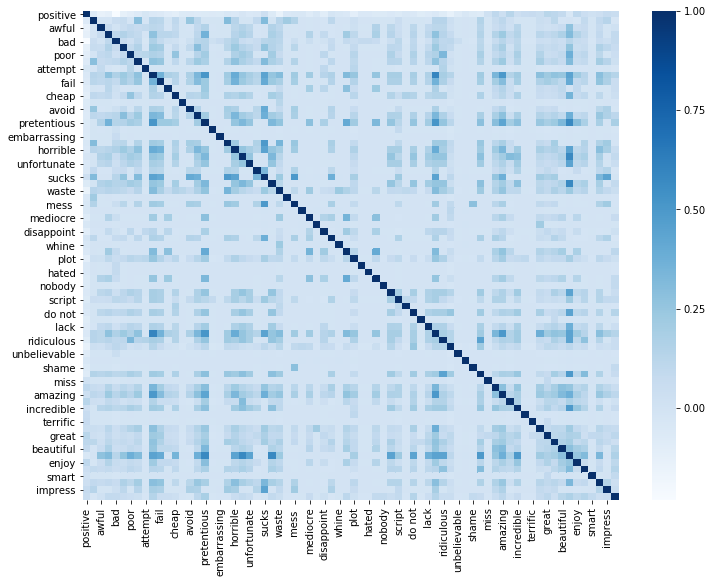

In [19]:
plt.figure(figsize = (12,9))
imdb['positive'] = (imdb['positive'] == 1)
sns.heatmap(imdb.corr(), cmap = 'Blues')

#Interesting correlation maps - test the model with and without including the highly correlated features

# Construct the model

In [46]:
data = imdb[keywords]
target = imdb['positive']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

pred = bnb.predict(data)

print('Out of {} predictions, {} were misclassified'.format(data.shape[0], (pred != target).sum()))
print('Accuracy: {}'.format(format(100*(target == pred).sum()/len(pred), '0.2f'))+'%')

Out of 748 predictions, 150 were misclassified
Accuracy: 79.95%


# Load Yelp dataset and evaluate model effectiveness

In [38]:
yelp = pd.read_csv('~/thinkful_mac/thinkful_large_files/yelp_labelled.csv', header = None)
yelp.columns = ['review', 'positive']


for key in keywords:
    yelp[str(key)] = yelp.review.str.contains(str(key), case = False)
    
yelp.head()

,review,positive,terrible,awful,worst,bad,stupid,poor,worse,attempt,...,great,fun,beautiful,well done,enjoy,perfect,smart,highly,impress,well
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


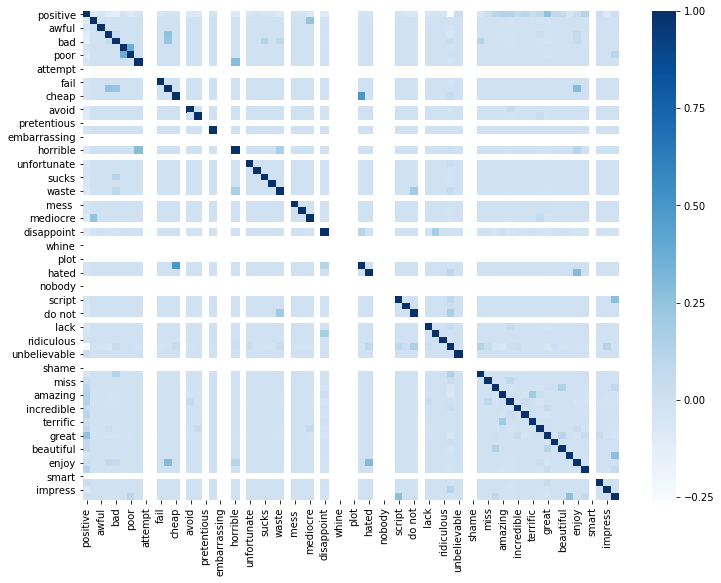

In [39]:
plt.figure(figsize = (12,9))
yelp['positive'] = (yelp['positive'] == 1)
sns.heatmap(yelp.corr(), cmap = 'Blues')

In [47]:
data = yelp[keywords]
target = yelp['positive']

# Instantiate our model and store it in a new variable.
#bnb = BernoulliNB()

#Let's try keeping our IMDB model from above intact (i.e. let's not re-fit the model to the yelp data)
#bnb.fit(data, target)

pred = bnb.predict(data)

print('Out of {} predictions, {} were misclassified'.format(data.shape[0], (pred != target).sum()))
print('Accuracy: {}'.format(format(100*(target == pred).sum()/len(pred), '0.2f'))+'%')

Out of 1000 predictions, 304 were misclassified
Accuracy: 69.60%


In [42]:
#Accuracy on Yelp reviews was 69.6%, not bad! Or is it...what was the success rate by just predicting all positive or all neg?
#What was distribution before? 50/50, so our model seems to be pretty good!
yelp.groupby('positive').count()

,review,terrible,awful,worst,bad,stupid,poor,worse,attempt,crap,...,great,fun,beautiful,well done,enjoy,perfect,smart,highly,impress,well
positive,,,,,,,,,,,,,,,,,,,,,
False,500,500,500,500,500,500,500,500,500,500,...,500,500,500,500,500,500,500,500,500,500
True,500,500,500,500,500,500,500,500,500,500,...,500,500,500,500,500,500,500,500,500,500


# Load Amazon dataset and evaluate model performance

In [48]:
amzn = pd.read_csv('~/thinkful_mac/thinkful_large_files/amazon_cells_labelled.csv', header = None)
amzn.columns = ['review', 'positive']

for key in keywords:
    amzn[str(key)] = amzn.review.str.contains(str(key), case = False)

amzn.head()

,review,positive,terrible,awful,worst,bad,stupid,poor,worse,attempt,...,great,fun,beautiful,well done,enjoy,perfect,smart,highly,impress,well
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


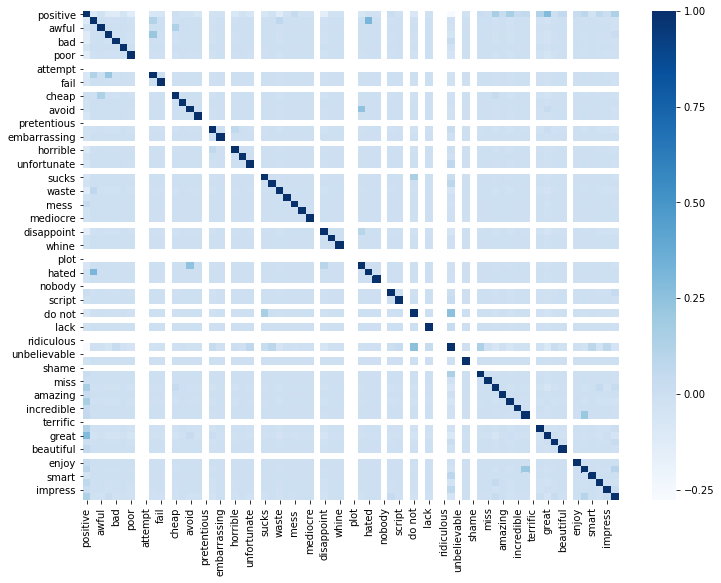

In [45]:
plt.figure(figsize = (12,9))
amzn['positive'] = (amzn['positive'] == 1)
sns.heatmap(amzn.corr(), cmap = 'Blues')

In [49]:
data = amzn[keywords]
target = amzn['positive']

# Instantiate our model and store it in a new variable.
#bnb = BernoulliNB()

#Let's try keeping our IMDB model from above intact (i.e. let's not re-fit the model to the amazon data)
#bnb.fit(data, target)

pred = bnb.predict(data)

print('Out of {} predictions, {} were misclassified'.format(data.shape[0], (pred != target).sum()))
print('Accuracy: {}'.format(format(100*(target == pred).sum()/len(pred), '0.2f'))+'%')

Out of 1000 predictions, 289 were misclassified
Accuracy: 71.10%


In [50]:
#What was distribution before? 50/50, so our model seems to be pretty good!
amzn.groupby('positive').count()

,review,terrible,awful,worst,bad,stupid,poor,worse,attempt,crap,...,great,fun,beautiful,well done,enjoy,perfect,smart,highly,impress,well
positive,,,,,,,,,,,,,,,,,,,,,
0,500,500,500,500,500,500,500,500,500,500,...,500,500,500,500,500,500,500,500,500,500
1,500,500,500,500,500,500,500,500,500,500,...,500,500,500,500,500,500,500,500,500,500


# Discussion

Interestingly, the model seems to have performed fairly well on all 3 datasets (despite being developed for IMDB data only), with accuracies >= 69% on all 3. The feature set took a while to develop, and was based mainly on my findings after looking through many IMDB reviews and including many of the key 'negative' words that I saw in those reviews. I also was able to improve the model accuracy quite a bit by removing the required spaces before and after words; I found that many of the reviews actually began with one of my negative keywords, so the model was not detecting them before (there would be no space before it).

In general though, I would not expect this feature engineering process to translate well across industries. I suppose it works for reviews because people tend to use the same set of positive/negative words if they are trying to convey positive/negative experiences.